## Imports

In [22]:
from utils_IT import *
from pathlib import Path
from collections import Counter
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Cow: 136 imágenes


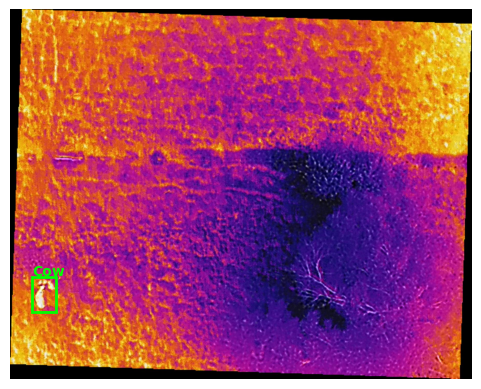

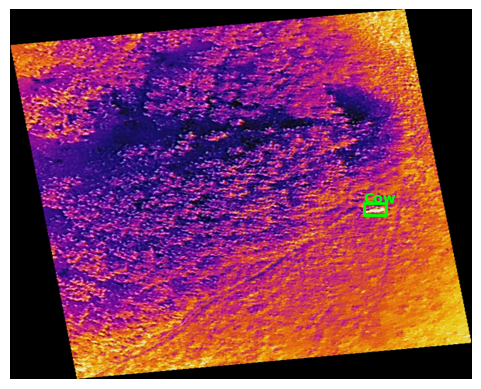

Deer: 106 imágenes


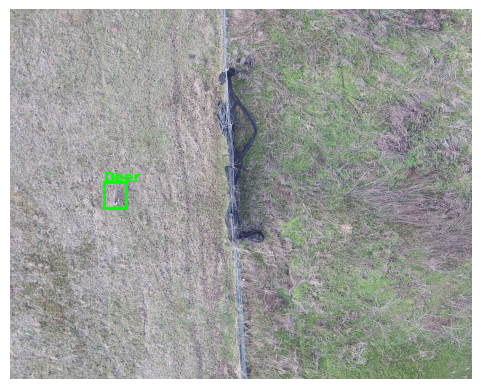

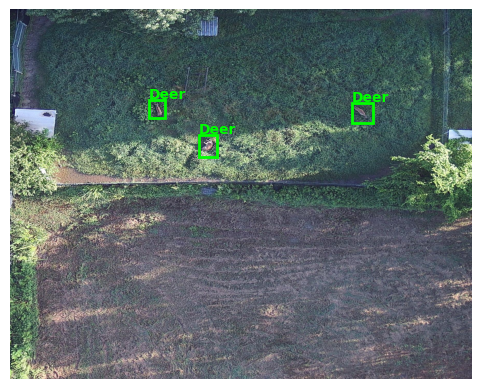

Horse: 86 imágenes


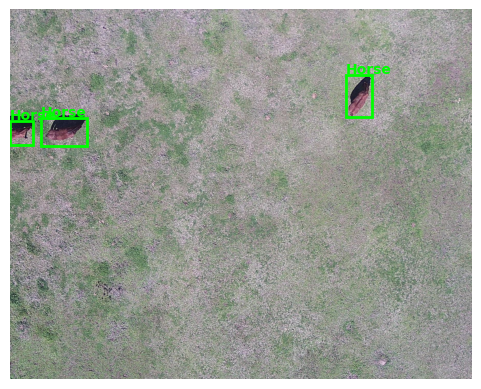

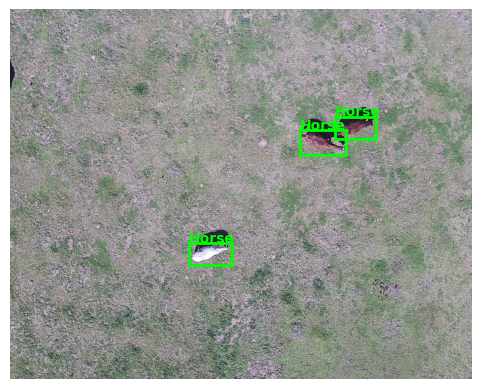

In [23]:
images = load_images_by_class('data', ['Cow', 'Deer', 'Horse'])

In [24]:
DATASET_ROOT = Path("data")
CLASSES = ['Horse', 'Deer', 'Cow']
IMG_EXTS = {'.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG'}

missing_txt = []
empty_txt = []
boxes_per_class = Counter()
boxes_per_image_per_class = {cls: [] for cls in CLASSES}

rel_areas = []
abs_areas = []

for cls_id, cls_name in enumerate(CLASSES):
    class_dir = DATASET_ROOT / cls_name.lower()
    
    for img_path in class_dir.rglob('*'):
        if img_path.suffix not in IMG_EXTS:
            continue
        txt_path = img_path.with_suffix('.txt')
        
        if not txt_path.exists():
            missing_txt.append(img_path)
            boxes_per_image_per_class[cls_name].append(0)
            continue
        
        with open(txt_path, 'r') as f:
            lines = [ln.strip() for ln in f if ln.strip()]

        if not lines:
            empty_txt.append(txt_path)
            boxes_per_image_per_class[cls_name].append(0)
            continue
        
        img = Image.open(img_path)
        w_img, h_img = img.size
        n_boxes = 0
        
        for line in lines:
            parts = line.split()
            if len(parts) != 5:
                continue
            
            c_id, x_c, y_c, bw, bh = map(float, parts)
            n_boxes += 1
            boxes_per_class[int(c_id)] += 1
            rel_areas.append(bw * bh)
            abs_areas.append((bw * w_img) * (bh * h_img))
        
        boxes_per_image_per_class[cls_name].append(n_boxes)

In [25]:
print("========== Annotations ==========")
print(f"- Images without .txt: {len(missing_txt)}")
print(f"- Files .txt empty: {len(empty_txt)}")
print()

========== Annotations ==========
- Images without .txt: 0
- Files .txt empty: 0



In [26]:
print("========== Boxes per class (total) ==========")
for c_id, total in boxes_per_class.items():
    print(f"  {CLASSES[c_id]}: {total} boxes")
print()

========== Boxes per class (total) ==========
  Cow: 256 boxes
  Deer: 192 boxes
  Horse: 448 boxes



In [27]:
print("========== Boxes per image (per class) ==========")
for cls in CLASSES:
    arr = np.array(boxes_per_image_per_class[cls])
    print(f"\n--- {cls} ---")
    print(f"- Images: {len(arr)}")
    print(f"- Average boxes/image: {arr.mean():.2f}")
    print(f"- Minimum: {arr.min()}")
    print(f"- Maximum: {arr.max()}")

========== Boxes per image (per class) ==========

--- Horse ---
- Images: 86
- Average boxes/image: 2.98
- Minimum: 1
- Maximum: 6

--- Deer ---
- Images: 106
- Average boxes/image: 1.81
- Minimum: 1
- Maximum: 6

--- Cow ---
- Images: 136
- Average boxes/image: 3.29
- Minimum: 1
- Maximum: 8


In [28]:
# Áreas
rel_areas = np.array(rel_areas)
abs_areas = np.array(abs_areas)

print("\n========== Relative area (bw * bh, [0,1]) ==========")
print(f"- Minimum: {rel_areas.min():.6f}")
print(f"- Median: {np.median(rel_areas):.6f}")
print(f"- 75%: {np.percentile(rel_areas, 75):.6f}")
print(f"- Maximum: {rel_areas.max():.6f}")


print("\n========== Absolute area (pixels) ==========")
print(f"- Minimum: {abs_areas.min():.1f}")
print(f"- Median: {np.median(abs_areas):.1f}")
print(f"- 75%: {np.percentile(abs_areas, 75):.1f}")
print(f"- Maximum: {abs_areas.max():.1f}")


========== Relative area (bw * bh, [0,1]) ==========
- Minimum: 0.000394
- Median: 0.003034
- 75%: 0.004503
- Maximum: 0.027420

========== Absolute area (pixels) ==========
- Minimum: 1011.3
- Median: 7797.6
- 75%: 11570.5
- Maximum: 70460.9
